# Task 1 - Exploratory Data Analysis
In this section, you will: 
- Load the necessary packages required for executing the code
- Load the data
- Summarize the features in the data set using descriptive statistics
- Study the features and their interrelationships using various visualizations

In [20]:
# Import 'numpy' and 'pandas' for working with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'matplotlib.pyplot' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import methods for regression diagnostic plots from 'statsmodels'
from statsmodels.api import ProbPlot, qqplot

In [21]:
# Load the data and take a look at it
# Note: Make sure that the data is in the same folder as the Jupyter notebook or specify the address correctly
df = pd.read_csv('Ames_Housing_Subset_1.csv', index_col = 'PID')
df.head()

,LotArea,Age,TotalBsmtSF,SalePrice
PID,,,,
526301100,31770,51,1080,215000
526350040,11622,50,882,105000
526351010,14267,53,1329,172000
526353030,11160,43,2110,244000
527105010,13830,14,928,189900


Feature description:
- PID: The unique identifier for a property
- LotArea: The area in square feet of the lot on which the property is built
- Age: The age of the property in years
- TotalBsmtSF: The area of the basement of the property in square feet
- SalePrice: The current selling price of the property in dollars

In [22]:
# Look at the specifics of the data frame using the '.info()' command
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 526301100 to 924151050
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LotArea      2929 non-null   int64
 1   Age          2929 non-null   int64
 2   TotalBsmtSF  2929 non-null   int64
 3   SalePrice    2929 non-null   int64
dtypes: int64(4)
memory usage: 114.4 KB


In [23]:
# Summarize the features in the data set using descriptive statistics using the '.describe()' command
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotArea,2929.0,10148.062820,7881.359580,1300.0,7440.0,9434.0,11556.0,215245.0
Age,2929.0,39.655514,30.243747,1.0,10.0,38.0,57.0,139.0
TotalBsmtSF,2929.0,1051.483441,440.870834,0.0,793.0,990.0,1302.0,6110.0
SalePrice,2929.0,180800.599522,79899.955086,12789.0,129500.0,160000.0,213500.0,755000.0


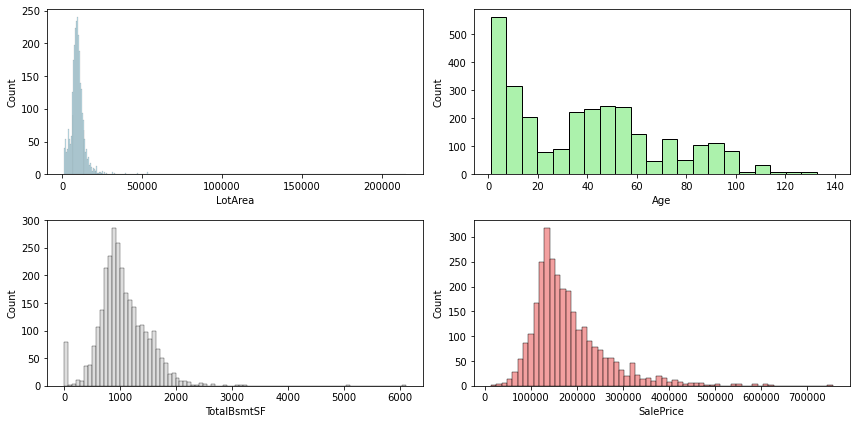

In [24]:
# Create histograms for the variables 'LotArea', 'Age', 'TotalBsmtSF' and 'SalePrice'
plt.figure(figsize = (12, 6))

colorname = ['lightblue', 'lightgreen', 'lightgray', 'lightcoral']
fignum = 0
for featurename in df.columns:
    fignum = fignum + 1
    plt.subplot(2, 2, fignum)
    sns.histplot(data = df, x = featurename, color = colorname[fignum - 1])

plt.tight_layout();

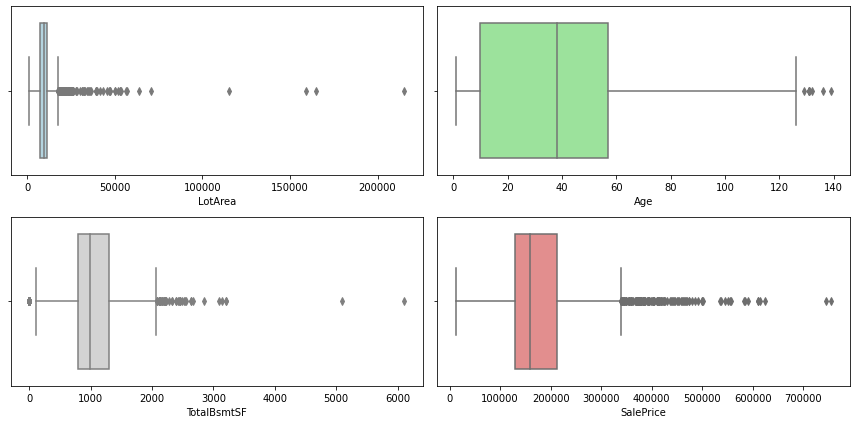

In [25]:
# Create box plots for the variables 'LotArea', 'Age', 'TotalBsmtSF' and 'SalePrice'
plt.figure(figsize = (12, 6))

colorname = ['lightblue', 'lightgreen', 'lightgray', 'lightcoral']
fignum = 0
for featurename in df.columns:
    fignum = fignum + 1
    plt.subplot(2, 2, fignum)
    sns.boxplot(data = df, x = featurename, color = colorname[fignum - 1])

plt.tight_layout();

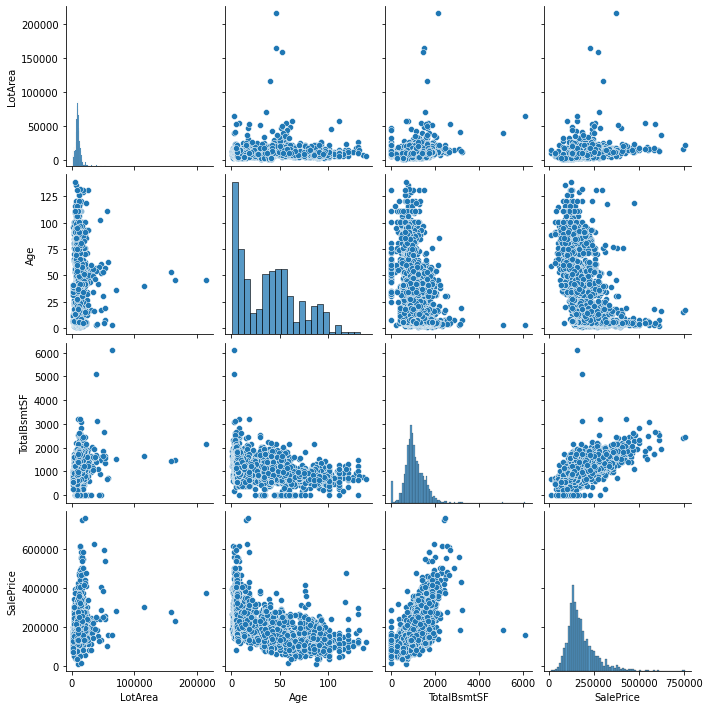

In [26]:
# Create a pair plot for the data
sns.pairplot(df);

# Task 2 : Simple Linear Regression
In this section, you will train and evaluate the following simple linear regression models:
- SalePrice vs LotArea
- SalePrice vs Age
- SalePrice vs TotalBsmtSF

### Model 1

In [27]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'LotArea'
lr_model_1 = smf.ols('SalePrice ~ LotArea', data = df)
lr_model_1 = lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     223.9
Date:                Wed, 23 Nov 2022   Prob (F-statistic):           7.93e-49
Time:                        08:17:53   Log-Likelihood:                -37112.
No. Observations:                2929   AIC:                         7.423e+04
Df Residuals:                    2927   BIC:                         7.424e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.534e+05   2320.465     66.098      0.0

### Model 2

In [28]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'Age'
lr_model_2 = smf.ols('SalePrice ~ Age', data = df)
lr_model_2 = lr_model_2.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1328.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          4.80e-240
Time:                        08:17:53   Log-Likelihood:                -36672.
No. Observations:                2929   AIC:                         7.335e+04
Df Residuals:                    2927   BIC:                         7.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.393e+05   2019.800    118.489      0.0

### Model 3

In [29]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'TotalBsmtSF'
lr_model_3 = smf.ols('SalePrice ~ TotalBsmtSF', data = df)
lr_model_3 = lr_model_3.fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     1954.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:17:53   Log-Likelihood:                -36471.
No. Observations:                2929   AIC:                         7.295e+04
Df Residuals:                    2927   BIC:                         7.296e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.023e+04   2957.662     20.365      

# Task 3 - Multiple Linear Regression
In this section, you will train and evaluate the following multiple linear regression models:
  - SalePrice vs LotArea and Age
  - SalePrice vs LotArea and TotalBsmtSF
  - SalePrice vs Age and TotalBsmtSF
  - SalePrice vs LotArea, Age and TotalBsmtSF

### Model 4

In [30]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'LotArea' and 'Age'
lr_model_4 = smf.ols('SalePrice ~ LotArea + Age', data = df)
lr_model_4 = lr_model_4.fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     883.0
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          9.45e-301
Time:                        08:17:53   Log-Likelihood:                -36528.
No. Observations:                2929   AIC:                         7.306e+04
Df Residuals:                    2926   BIC:                         7.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.126e+05   2462.683     86.331      0.0

### Model 5

In [31]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'LotArea' and 'TotalBsmtSF'
lr_model_5 = smf.ols('SalePrice ~ LotArea + TotalBsmtSF', data = df)
lr_model_5 = lr_model_5.fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1026.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:17:53   Log-Likelihood:                -36441.
No. Observations:                2929   AIC:                         7.289e+04
Df Residuals:                    2926   BIC:                         7.291e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.406e+04   3035.381     17.810      

### Model 6

In [32]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'Age' and 'TotalBsmtSF'
lr_model_6 = smf.ols('SalePrice ~ Age + TotalBsmtSF', data = df)
lr_model_6 = lr_model_6.fit()
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     1513.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:17:53   Log-Likelihood:                -36180.
No. Observations:                2929   AIC:                         7.237e+04
Df Residuals:                    2926   BIC:                         7.238e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.26e+05   3728.279     33.802      

### Model 7

In [33]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'LotArea', 'Age', and 'TotalBsmtSF'
lr_model_7 = smf.ols('SalePrice ~ LotArea + Age + TotalBsmtSF', data = df)
lr_model_7 = lr_model_7.fit()
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1091.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):               0.00
Time:                        08:17:53   Log-Likelihood:                -36120.
No. Observations:                2929   AIC:                         7.225e+04
Df Residuals:                    2925   BIC:                         7.227e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.207e+05   3685.960     32.735      

# Task 4 - Diagnostic Plots

In this section, we will create the following diagnostic plots for *lr_model_7*: 
- Fitted vs Actual values
- Fitted values vs Residuals
- QQ-plot

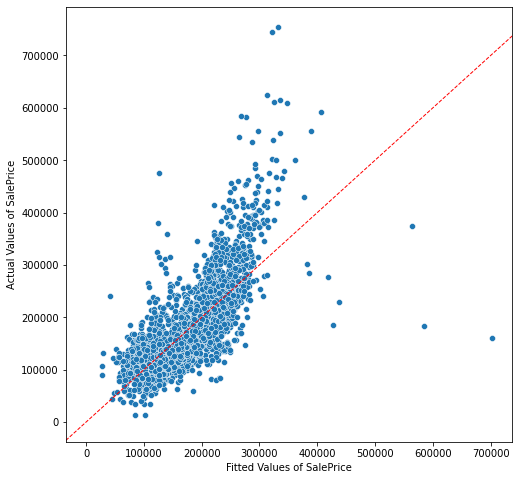

In [16]:
# Create a scatter plot between the fitted and actual values of 'SalePrice'
plt.figure(figsize = (8, 8))
sns.scatterplot(x = lr_model_7.fittedvalues, y = df['SalePrice'])
plt.axline((100,100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of SalePrice')
plt.ylabel('Actual Values of SalePrice');

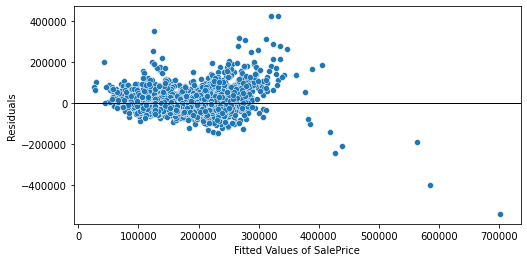

In [17]:
# Create a scatter plot between the fitted values of 'SalePrice' and the residuals
plt.figure(figsize = (8, 4))
sns.scatterplot(x = lr_model_7.fittedvalues, y = lr_model_7.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of SalePrice')
plt.ylabel('Residuals');

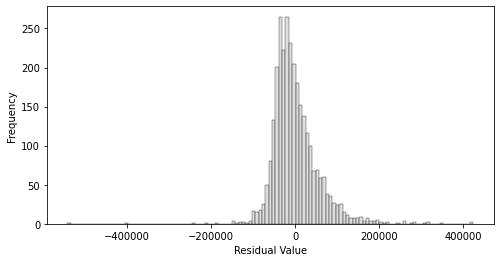

In [18]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = lr_model_7.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


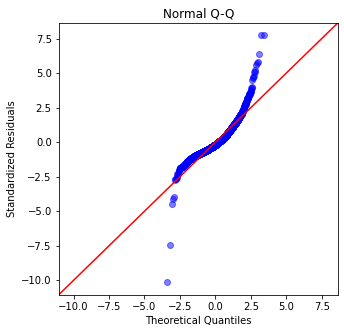

In [19]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_7.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(5, 5)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');